In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# MODEL

In [2]:
df =pd.DataFrame(pd.read_csv('Data_for_Regression_m.csv',low_memory=False))
df

,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,...,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA,B,F,W,good,renovated,to_renovate
0,4180,1,295000.0,3.0,242.0,1,0,0,1,36.0,...,0,0,0,0,0,0,1,1,0,0
1,8730,1,675000.0,4.0,349.0,1,0,0,0,0.0,...,0,0,0,1,0,1,0,1,0,0
2,4020,1,250000.0,5.0,303.0,1,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,1
3,1200,1,545000.0,4.0,235.0,1,1,0,0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1190,1,500000.0,2.0,220.0,1,0,0,0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,8790,0,250000.0,1.0,300.0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0
11284,2018,0,298000.0,1.0,71.0,1,0,0,1,12.0,...,0,0,0,0,0,1,0,1,0,0
11285,2610,0,1500000.0,10.0,520.0,1,0,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0
11286,2000,0,150000.0,1.0,40.0,1,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [3]:
delete_col = ['furnished','open_fire','swimming_pool_has', 'APARTMENT', 'APARTMENT_BLOCK','BUNGALOW','CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX', 'EXCEPTIONAL_PROPERTY',      'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR', 'HOUSE', 'KOT', 'LOFT','MANOR_HOUSE', 'MANSION', 'MIXED_USE_BUILDING', 'OTHER_PROPERTY','PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA', 'land_surface','terrace','terrace_area','garden','garden_area']
df = df.drop(delete_col, axis=1)

df.pop('postcode')
df = df
df

,house_is,price,rooms_number,area,equipped_kitchen_has,B,F,W,good,renovated,to_renovate
0,1,295000.0,3.0,242.0,1,0,0,1,1,0,0
1,1,675000.0,4.0,349.0,1,0,1,0,1,0,0
2,1,250000.0,5.0,303.0,1,0,0,1,0,0,1
3,1,545000.0,4.0,235.0,1,1,0,0,0,1,0
4,1,500000.0,2.0,220.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11283,0,250000.0,1.0,300.0,0,0,1,0,1,0,0
11284,0,298000.0,1.0,71.0,1,0,1,0,1,0,0
11285,0,1500000.0,10.0,520.0,1,0,1,0,1,0,0
11286,0,150000.0,1.0,40.0,1,0,1,0,0,0,1


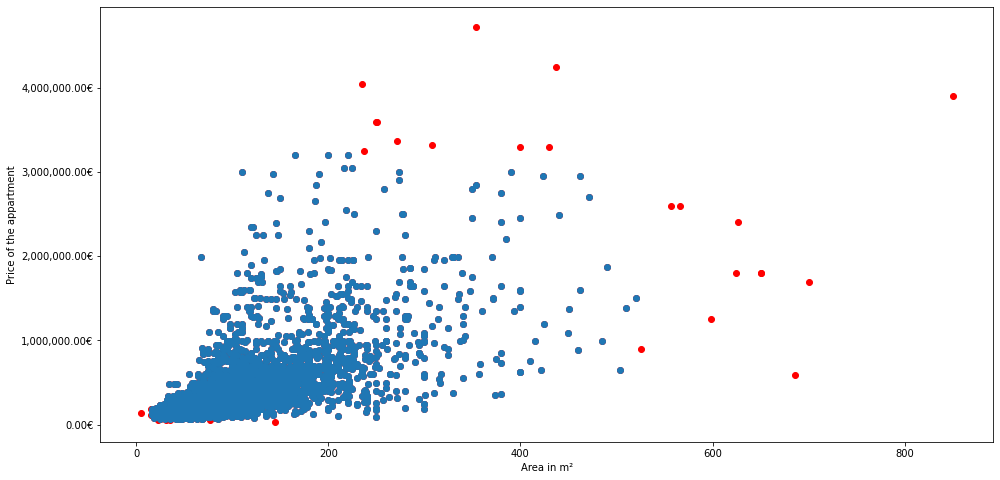

In [4]:
appart =  df[df.house_is == 0]
appart = appart[appart.area < 1000]


appart_ok = appart[appart.area.between(appart.area.quantile(.001), appart.area.quantile(.998))] # without outliers
appart_ok = appart_ok[appart_ok.price.between(appart_ok.price.quantile(.001), appart_ok.price.quantile(.998))]

fig, ax = plt.subplots(figsize=(16,8))


ax.scatter(appart['area'], appart['price'], c='r')
ax.scatter(appart_ok['area'], appart_ok['price'])
ax.set_xlabel('Area in m²')
ax.set_ylabel('Price of the appartment')
fmt = '{x:,.2f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

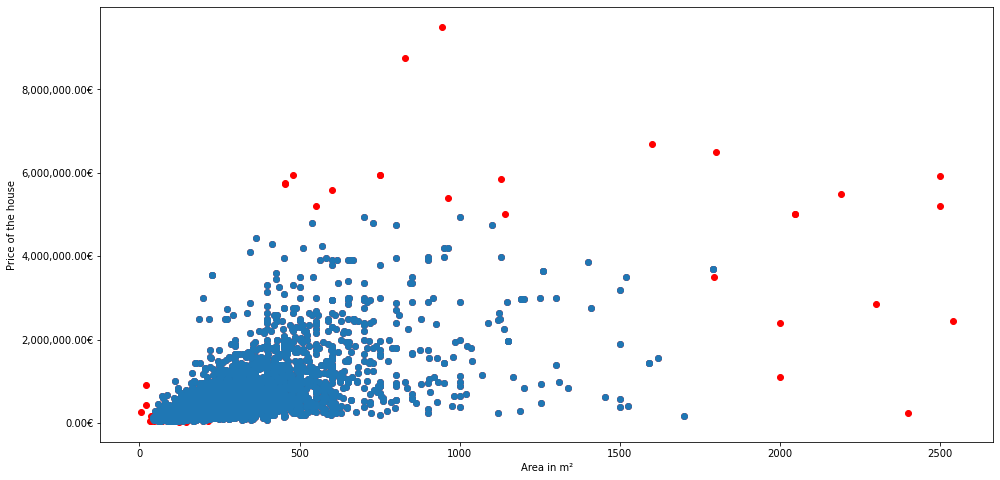

In [5]:
house =  df[df.house_is == 1]
house =  house[df.area < 3000]

house_ok = house[house.area.between(house.area.quantile(.001), house.area.quantile(.998))] # without outliers
house_ok = house_ok[house_ok.price.between(house_ok.price.quantile(.001), house_ok.price.quantile(.998))]

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(house['area'], house['price'], c='r')
ax.scatter(house_ok['area'], house_ok['price'])
ax.set_xlabel('Area in m²')
ax.set_ylabel('Price of the house')
fmt = '{x:,.2f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

In [6]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#df= appart_ok
#df= house_ok
#df = pd.concat([appart_ok, house_ok])

scaler = MinMaxScaler()
num_vars = ['price', 'rooms_number', 'area']
df[num_vars] = scaler.fit_transform(df[num_vars])

#scaler = StandardScaler()
#df_transform = scaler.fit_transform(df)
#df = pd.DataFrame(df_transform, index=df.index, columns=df.columns)

df

,house_is,price,rooms_number,area,equipped_kitchen_has,B,F,W,good,renovated,to_renovate
0,1,0.018030,0.014706,0.025635,1,0,0,1,1,0,0
1,1,0.043406,0.019608,0.037209,1,0,1,0,1,0,0
2,1,0.015025,0.024510,0.032234,1,0,0,1,0,0,1
3,1,0.034725,0.019608,0.024878,1,1,0,0,0,1,0
4,1,0.031720,0.009804,0.023256,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11283,0,0.015025,0.004902,0.031909,0,0,1,0,1,0,0
11284,0,0.018230,0.004902,0.007139,1,0,1,0,1,0,0
11285,0,0.098497,0.049020,0.055706,1,0,1,0,1,0,0
11286,0,0.008347,0.004902,0.003786,1,0,1,0,0,0,1


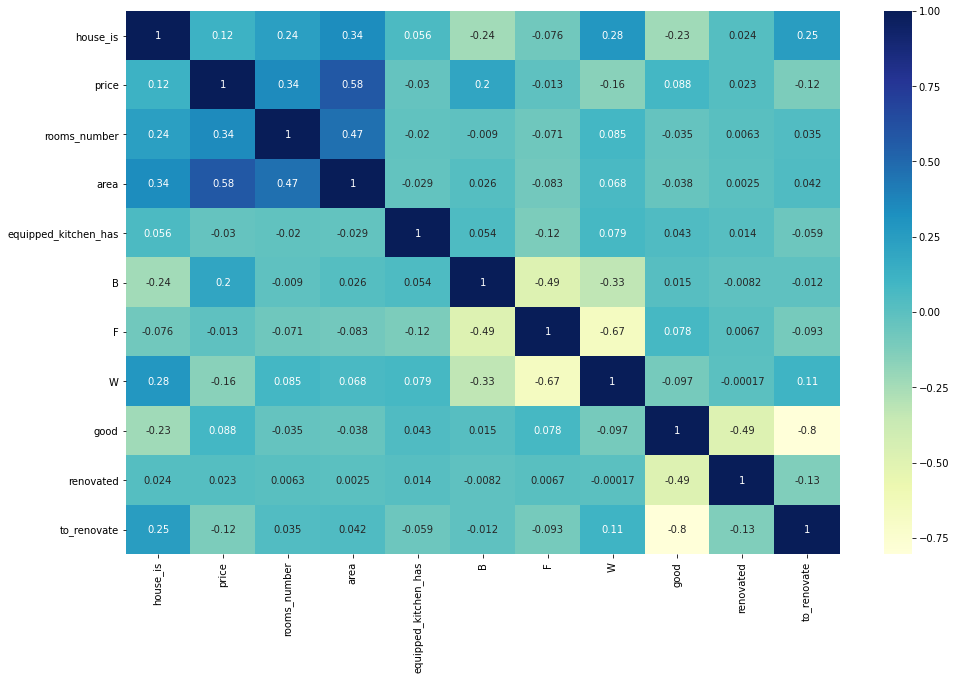

In [7]:


plt.figure(figsize = (16, 10))
corr = df
sns.heatmap(corr.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [8]:
y = df.pop('price')
X = df
X

,house_is,rooms_number,area,equipped_kitchen_has,B,F,W,good,renovated,to_renovate
0,1,0.014706,0.025635,1,0,0,1,1,0,0
1,1,0.019608,0.037209,1,0,1,0,1,0,0
2,1,0.024510,0.032234,1,0,0,1,0,0,1
3,1,0.019608,0.024878,1,1,0,0,0,1,0
4,1,0.009804,0.023256,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11283,0,0.004902,0.031909,0,0,1,0,1,0,0
11284,0,0.004902,0.007139,1,0,1,0,1,0,0
11285,0,0.049020,0.055706,1,0,1,0,1,0,0
11286,0,0.004902,0.003786,1,0,1,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#X_train, X_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=41, test_size=0.2)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


       house_is  rooms_number      area  equipped_kitchen_has  B  F  W  good  \
3389          1      0.014706  0.022931                     1  1  0  0     1   
10539         0      0.009804  0.006706                     1  0  1  0     1   
4274          1      0.044118  0.077339                     1  0  0  1     1   
2             1      0.024510  0.032234                     1  0  0  1     0   
361           1      0.063725  0.171444                     1  1  0  0     0   
...         ...           ...       ...                   ... .. .. ..   ...   
8513          0      0.009804  0.010384                     1  0  1  0     1   
5200          1      0.019608  0.013521                     1  0  0  1     0   
4066          1      0.024510  0.069767                     1  1  0  0     1   
931           1      0.034314  0.020984                     1  0  0  1     1   
1984          1      0.029412  0.038399                     0  0  1  0     0   

       renovated  to_renovate  
3389   

In [10]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

In [11]:
# Train the model using the training sets
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

0.40304729147712337

In [12]:
y_pred = regr.predict(X_test)
print(regr.score(X_test, y_test))

0.4707029980335623


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
pipe = make_pipeline(PolynomialFeatures(degree),
                         LinearRegression())

pipe.fit(X_train,y_train)
print(pipe.score(X_train, y_train))


y_predict = pipe.predict(X_test)
print(pipe.score(X_test, y_test))






0.6108545484494305
0.630863727617085


In [14]:
# MINMAX SCALER
#degree = 1   --> y    0.4719217522883491
#degree = 2   --> y    0.6027760139125359
#degree = 3   --> y    0.630863727617085
#degree = 4   --> y    -167.91795559881507
#degree = 5   --> y    -21979797137487.938
#-------------------------------------------------
#degree = 1   --> y    0.47168483846473686
#degree = 2   --> y    0.6029459870950105
#degree = 3   --> y    0.6289840792545587
#degree = 3   --> y    -169.56923548948026
#-------------------------------------------------

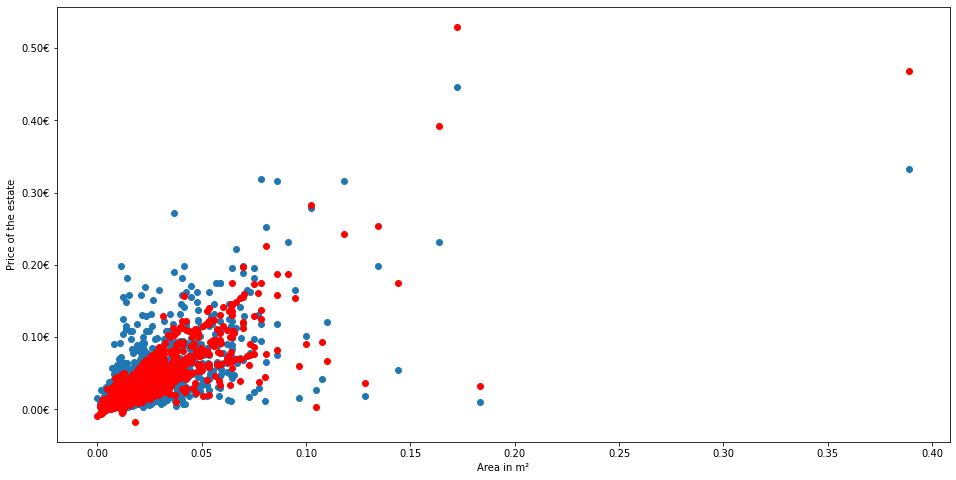

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_test[['area']], y_test)
ax.scatter(X_test[['area']], y_predict, c='r')
ax.set_xlabel('Area in m²')
ax.set_ylabel('Price of the estate')
fmt = '{x:,.2f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()